# GBM OV

Dileep D. Monie

---

Notebook to support GBM OV manuscript.

In [1]:
from __future__ import print_function

import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import seaborn as sns

# for Notebook
%matplotlib inline

print('Last Updated On: ', dt.datetime.now())

Last Updated On:  2021-01-09 03:37:17.274877


In [2]:
# define color schemes
# NetDecoder
warm = '#f9a635'
cool = '#1c9099'

# https://colorbrewer2.org/#type=qualitative&scheme=Accent&n=5
accent1 = '#7fc97f'
accent2 = '#beaed4'
accent3 = '#fdc086'
accent4 = '#ffff99'
accent5 = '#386cb0'

In [3]:
# define lists of nodes (GARS = GARS1)
nodes =   ['AHSA1','CASP3','CCL5','CFTR','COPS5','CUL3','DCP2','DDX58','FN1',
           'GARS1','GTPBP1','HLA-E','HNRNPA1','HSP90AA1','HUWE1','IFIT1',
           'IFIT3','IKBKE','IL32','IMPDH2','IRF7','LYN','MCM3','MCM7','NCL',
           'P4HA1','PAN2','PF4','PIGR','PLAT','POLR2H','PRKAR1A','PRKCB','RPA3',
           'RPL6','SERPINA5','SKIL','SMAD4','SMAD6','SPTBN1','STAT1','STAT2',
           'STIP1','SUMO1','THBD','TUT1','UBC','XRN2','YBX1','ZC3HAV1']

sources = ['CCL5','DDX58','GTPBP1','HLA-E','IFIT1','IFIT3','IL32','IRF7',
           'STAT1','STAT2','ZC3HAV1']

routers = ['AHSA1','CASP3','CFTR','COPS5','CUL3','DCP2','FN1','GARS1',
           'HNRNPA1','HSP90AA1','HUWE1','IKBKE','IMPDH2','LYN','MCM3','MCM7',
           'NCL','P4HA1','PF4','PIGR','PLAT','POLR2H','PRKAR1A','PRKCB','RPA3',
           'SERPINA5','SKIL','SMAD4','SMAD6','SPTBN1','STIP1','THBD','TUT1',
           'UBC']

targets = ['PAN2','RPL6','SUMO1','XRN2','YBX1']

## DepMap violin plots

Download data from https://depmap.org/portal/download/custom/ using these parameters:
* DATASETS: Gene
  * CRISPR (Avana) Public 20Q4
  * Combined RNAi (Broad, Novartis, Marcotte)
* CELL LINES: Central Nervous System > Glioma > Glioblastoma
>>
ACH-000283,ACH-000558,ACH-000269,ACH-001329,ACH-000464,ACH-002223,ACH-002224,ACH-002225,ACH-002226,ACH-002227,ACH-002228,ACH-002229,ACH-002230,ACH-002231,ACH-000863,ACH-000244,ACH-000098,ACH-000738,ACH-000756,ACH-000102,ACH-000027,ACH-000231,ACH-000622,ACH-000445,ACH-000479,ACH-002259,ACH-000819,ACH-000328,ACH-000595,ACH-000634,ACH-000215,ACH-002268,ACH-000455,ACH-000673,ACH-000676,ACH-000760,ACH-000152,ACH-000200,ACH-001605,ACH-001606,ACH-001608,ACH-001609,ACH-001610,ACH-001611,ACH-001622,ACH-001623,ACH-001624,ACH-000887,ACH-000376,ACH-001198,ACH-000368,ACH-000623,ACH-000289,ACH-000543,ACH-000370,ACH-000571,ACH-000208,ACH-000036,ACH-000469,ACH-000570
* GENES/COMPOUNDS (note: GARS = GARS1)
>>
AHSA1 CASP3 CCL5 CFTR COPS5 CUL3 DCP2 DDX58 FN1 GARS1 GTPBP1 HLA-E HNRNPA1 HSP90AA1 HUWE1 IFIT1 IFIT3 IKBKE IL32 IMPDH2 IRF7 LYN MCM3 MCM7 NCL P4HA1 PAN2 PF4 PIGR PLAT POLR2H PRKAR1A PRKCB RPA3 RPL6 SERPINA5 SKIL SMAD4 SMAD6 SPTBN1 STAT1 STAT2 STIP1 SUMO1 THBD TUT1 UBC XRN2 YBX1 ZC3HAV1 CCN1
* Download File options
  * Add cell line metadata to download


In [4]:
# upload DepMap GBM CSV files
from google.colab import files
uploaded = files.upload()

Saving depmap_gbm.zip to depmap_gbm.zip


In [5]:
!unzip depmap_gbm.zip

Archive:  depmap_gbm.zip
  inflating: Combined_RNAi_(Broad,_Novartis,_Marcotte)_subsetted.csv  
  inflating: CRISPR_(Avana)_Public_20Q4_subsetted.csv  


In [6]:
# make DEMETER2 dataframe from CSV file
demeter2 = pd.read_csv('Combined_RNAi_(Broad,_Novartis,_Marcotte)_subsetted.csv',
                       sep=',')
demeter2.index = demeter2['cell_line_display_name']
demeter2 = demeter2.drop(['depmap_id', 'cell_line_display_name',	'lineage_1',
                          'lineage_2',	'lineage_3', 'lineage_4'], axis=1)
demeter2 = demeter2.dropna(axis=1, how='all') # drop genes without data

# sort genes by median values
d2_sorted = demeter2.median().sort_values(ascending=False).index
demeter2 = demeter2.reindex(d2_sorted, axis=1)

demeter2.head()

,IFIT1,TUT1,AHSA1,PF4,P4HA1,IFIT3,CASP3,IRF7,STAT1,LYN,SPTBN1,SKIL,PRKCB,CCN1,FN1,ZC3HAV1,HLA-E,SMAD4,IKBKE,CFTR,SUMO1,DDX58,STAT2,PIGR,THBD,DCP2,IMPDH2,GARS1,PLAT,MCM3,CCL5,GTPBP1,SMAD6,PAN2,HSP90AA1,CUL3,XRN2,YBX1,SERPINA5,HNRNPA1,IL32,PRKAR1A,HUWE1,POLR2H,UBC,RPA3,MCM7,NCL,COPS5,RPL6
cell_line_display_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A1207,NaN,NaN,NaN,0.154927,0.094002,0.058641,0.315829,0.034481,-0.308585,0.053384,NaN,-0.366619,0.075403,NaN,-0.205039,-0.014826,0.422505,-0.170207,0.026021,-0.343665,NaN,NaN,-0.395059,-0.139554,0.034579,-0.405488,0.196866,0.030724,-0.548488,-0.534704,-0.190149,-0.358846,-0.671213,-0.336643,-0.194518,-0.249235,-0.625859,-0.165627,-0.251084,-0.351794,-0.294506,0.334405,-0.123944,-0.674187,-0.561995,-0.271073,-0.312210,-0.716922,-0.849352,-1.164213
A172,NaN,NaN,NaN,-0.179130,-0.029829,-0.250591,-0.008627,0.074441,-0.104508,0.032159,NaN,0.021937,-0.052814,-0.013328,0.106487,-0.083343,-0.160485,-0.347563,0.030832,-0.016289,-0.344587,-0.234725,-0.059427,-0.177240,-0.099404,-0.222173,0.057766,-0.143355,-0.148862,-0.153992,-0.366879,-0.276306,0.186915,-0.293355,-0.339483,0.093786,-0.474236,-0.342489,-0.241595,-0.107302,-0.038235,-0.764851,-0.574027,-0.667129,-0.297928,-0.586050,-1.003106,-1.554954,-0.858602,-1.177003
AM38,NaN,NaN,NaN,0.179168,0.081678,0.053025,0.133132,-0.018746,-0.225727,0.015415,NaN,-0.129096,0.063127,NaN,0.213513,0.020610,0.015387,0.159587,-0.008965,0.069692,NaN,NaN,-0.158001,0.006648,-0.069390,0.014203,-0.189620,-0.157407,-0.224158,-0.410563,0.035337,-0.059532,-0.104453,-0.013085,-0.215619,-0.268065,-0.278911,-0.020951,-0.368904,-0.273210,-0.346361,0.376216,-0.507431,-0.432868,-0.635937,-0.872768,-0.721637,-0.493289,-0.882870,-1.073728
ANGMCSS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAS1,NaN,NaN,NaN,-0.131653,-0.054665,0.150857,-0.306722,0.174529,-0.150828,0.145463,NaN,0.082876,0.184492,0.053651,0.033012,-0.110081,0.174737,0.001549,-0.153038,-0.180650,-0.236280,0.102637,-0.173305,0.155510,-0.170358,-0.160090,-0.574950,0.374164,-0.159435,-0.343386,-0.067618,-0.169946,-0.239733,0.087169,-0.576721,-0.396768,-0.246519,-0.849739,-0.555653,-0.376178,-0.467039,-0.283373,-0.364544,-0.707272,-1.513724,-0.682350,-1.009712,-0.546616,-0.757359,-1.308616


In [7]:
# make Avana dataframe from CSV file
avana = pd.read_csv("CRISPR_(Avana)_Public_20Q4_subsetted.csv", sep=",")
avana.index = avana['cell_line_display_name']
avana = avana.drop(['depmap_id', 'cell_line_display_name',	'lineage_1',
                    'lineage_2',	'lineage_3', 'lineage_4'], axis=1)
avana = avana.dropna(axis=1, how='all') # drop genes without data

# sort genes by median values
avana_sorted = avana.median().sort_values(ascending=False).index
avana = avana.reindex(avana_sorted, axis=1)

avana.head()

,IL32,STAT1,PIGR,LYN,IFIT3,SKIL,P4HA1,CFTR,CASP3,PRKCB,SPTBN1,CCN1,PLAT,FN1,SMAD4,DCP2,IKBKE,DDX58,IRF7,IFIT1,THBD,SERPINA5,ZC3HAV1,AHSA1,HSP90AA1,STAT2,HNRNPA1,SUMO1,CCL5,STIP1,HLA-E,GTPBP1,SMAD6,PF4,PAN2,IMPDH2,PRKAR1A,CUL3,MCM3,NCL,YBX1,POLR2H,RPL6,GARS1,UBC,HUWE1,RPA3,TUT1,XRN2,MCM7,COPS5
cell_line_display_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A1207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AM38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANGMCSS,0.075193,0.139231,0.141896,0.090872,0.020141,0.118656,0.083800,0.050747,0.045469,-0.063713,-0.007408,0.079571,-0.101469,0.036265,0.037951,0.146396,-0.037361,-0.063708,-0.062608,-0.060292,-0.122292,-0.197494,-0.27215,-0.128863,-0.048628,-0.367233,-0.216770,-0.108883,-0.276788,0.033224,-0.289088,-0.039820,-0.272064,-0.220940,-0.393701,-0.283421,-0.721214,-0.643803,-0.801150,-1.019170,-0.830624,-1.215938,-0.795060,-1.151188,-0.712574,-1.131321,-1.098615,-1.286730,-1.068232,-1.171851,-1.429376
CAS1,0.180597,0.206135,0.348070,-0.210794,0.005212,0.033372,0.038199,-0.050415,-0.134789,0.041189,-0.109326,-0.005762,-0.315451,-0.271256,0.275964,0.058164,-0.079364,0.051295,-0.254063,-0.097873,-0.141719,-0.289283,-0.10032,-0.237934,-0.205916,-0.131139,-0.279507,-0.124170,-0.075033,-0.252640,-0.217654,0.038259,-0.324630,-0.081638,-0.330896,-0.552240,-0.579172,-1.156935,-1.115755,-0.814497,-1.263969,-0.688799,-0.769046,-1.387628,-1.614964,-1.224767,-1.305708,-1.443365,-1.314795,-1.452567,-1.676389


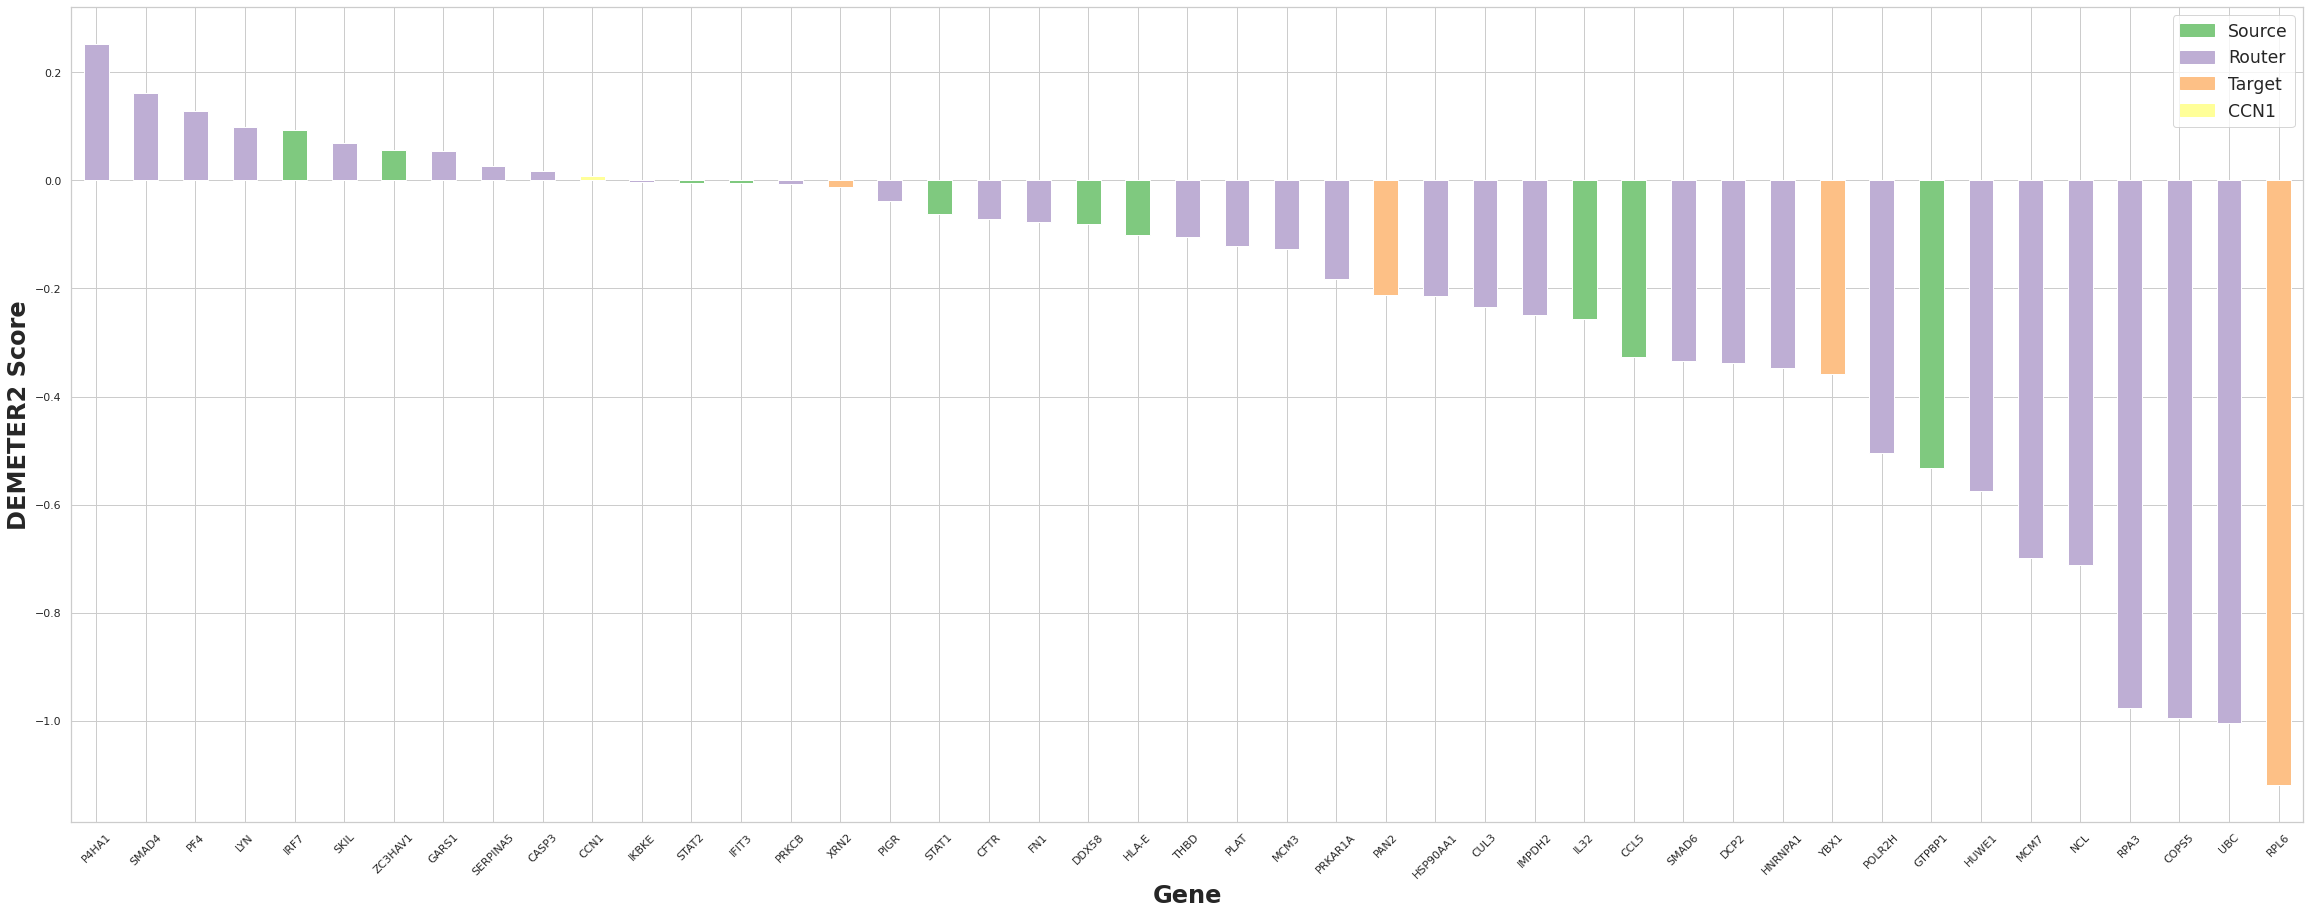

In [20]:
# waterfall bar plot of LN229 DEMETER2 scores (not in Avana dataset)

# set seaborn plot parameters
sns.set(rc={'figure.figsize':(40,15)})
sns.set_theme(style='whitegrid')

# make LN229 cell line RNAi dataframe
ln229_d2 = demeter2.loc['LN229']
ln229_d2 = ln229_d2.dropna() # drop genes without DEMETER2 scores
ln229_d2 = ln229_d2.sort_values(ascending=False) # sort for waterfall

# generate color palette
#colors = np.where(ln229_d2<0, warm, cool) # standard
colors = [] # based on node types
for column in ln229_d2.index:
    if (column in sources):
      colors.append(accent1)
    if (column in routers):
      colors.append(accent2)
    if (column in targets):
      colors.append(accent3)
    if (column == 'CCN1'):
      colors.append(accent4)

# make plot
ax = ln229_d2.plot.bar(color=colors)

# draw horizontal line of interest
#ax.axhline(-0.5)

# label plot
#plt.title('LN229 RNAi Gene Dependencies')
plt.xlabel('Gene', fontsize=24, weight='bold')
plt.xticks(rotation=45)
plt.ylabel('DEMETER2 Score', fontsize=24, weight='bold')

# generate legend
source_patch = mpatches.Patch(color=accent1, label='Source')
router_patch = mpatches.Patch(color=accent2, label='Router')
target_patch = mpatches.Patch(color=accent3, label='Target')
ccn1_patch = mpatches.Patch(color=accent4, label='CCN1')
plt.legend(handles=[source_patch,router_patch,target_patch,ccn1_patch],
           fontsize='x-large')

# save and show figure
plt.savefig('4A_LN229_DEMETER2.svg')
plt.show()

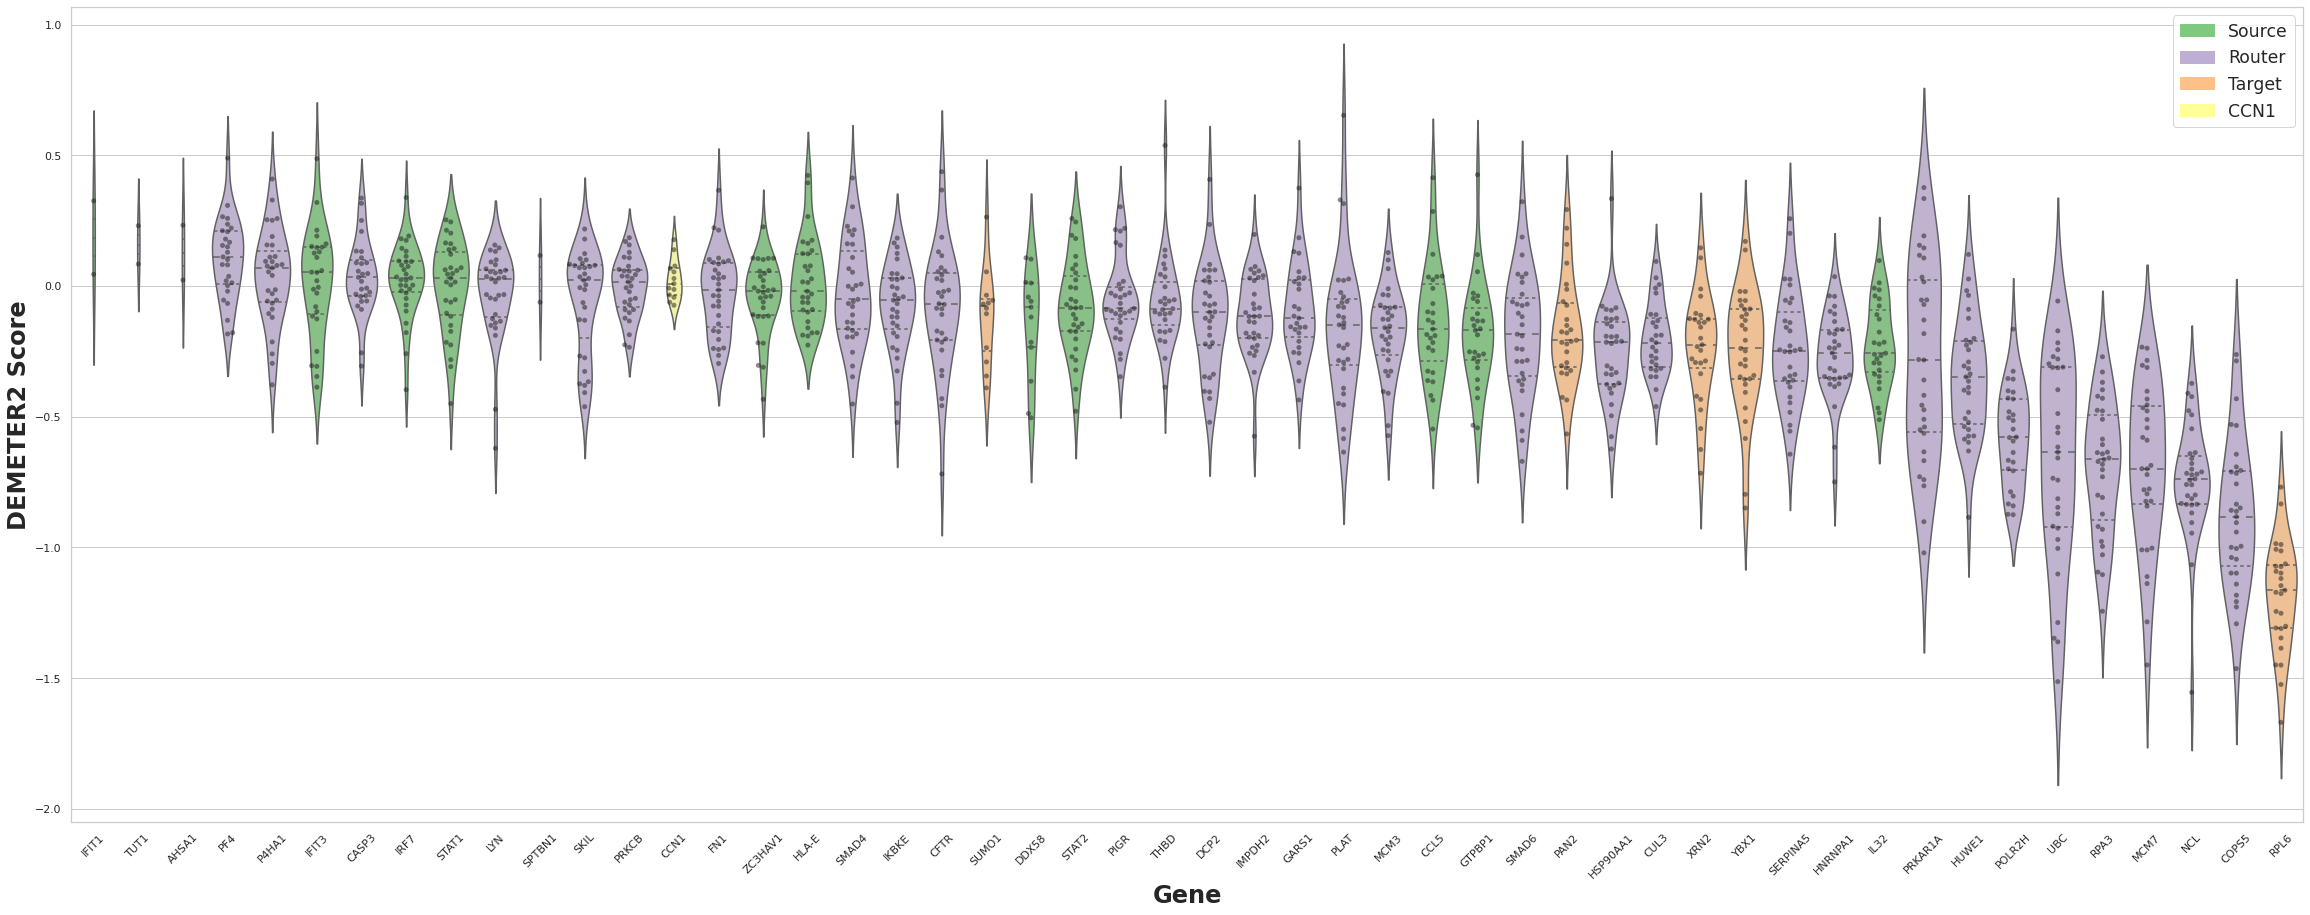

In [9]:
# violin plot of RNAi gene dependencies

# set seaborn plot parameters
sns.set(rc={'figure.figsize':(40,15)})
sns.set_theme(style='whitegrid')

# generate color palette
#colors = np.where(demeter2.median()<-0.5, warm, cool) # based on medians
colors = [] # based on node types
for column in demeter2:
    if (column in sources):
      colors.append(accent1)
    if (column in routers):
      colors.append(accent2)
    if (column in targets):
      colors.append(accent3)
    if (column == 'CCN1'):
      colors.append(accent4)

# generate violin plot
ax = sns.violinplot(data=demeter2, palette=colors, scale='count', inner='quartile')

# overlay swarm plot
ax = sns.swarmplot(data=demeter2, color='k', alpha=0.5)

# draw horizontal line of interest
#ax.axhline(-0.5)

# label plot
#plt.title('RNAi Gene Dependencies')
plt.xlabel('Gene', fontsize=24, weight='bold')
plt.xticks(rotation=45)
plt.ylabel('DEMETER2 Score', fontsize=24, weight='bold')

# generate legend
source_patch = mpatches.Patch(color=accent1, label='Source')
router_patch = mpatches.Patch(color=accent2, label='Router')
target_patch = mpatches.Patch(color=accent3, label='Target')
ccn1_patch = mpatches.Patch(color=accent4, label='CCN1')
plt.legend(handles=[source_patch,router_patch,target_patch,ccn1_patch],
           fontsize='x-large')

# save and show figure
plt.savefig('4B_GBM_DEMETER2.svg')
plt.show()

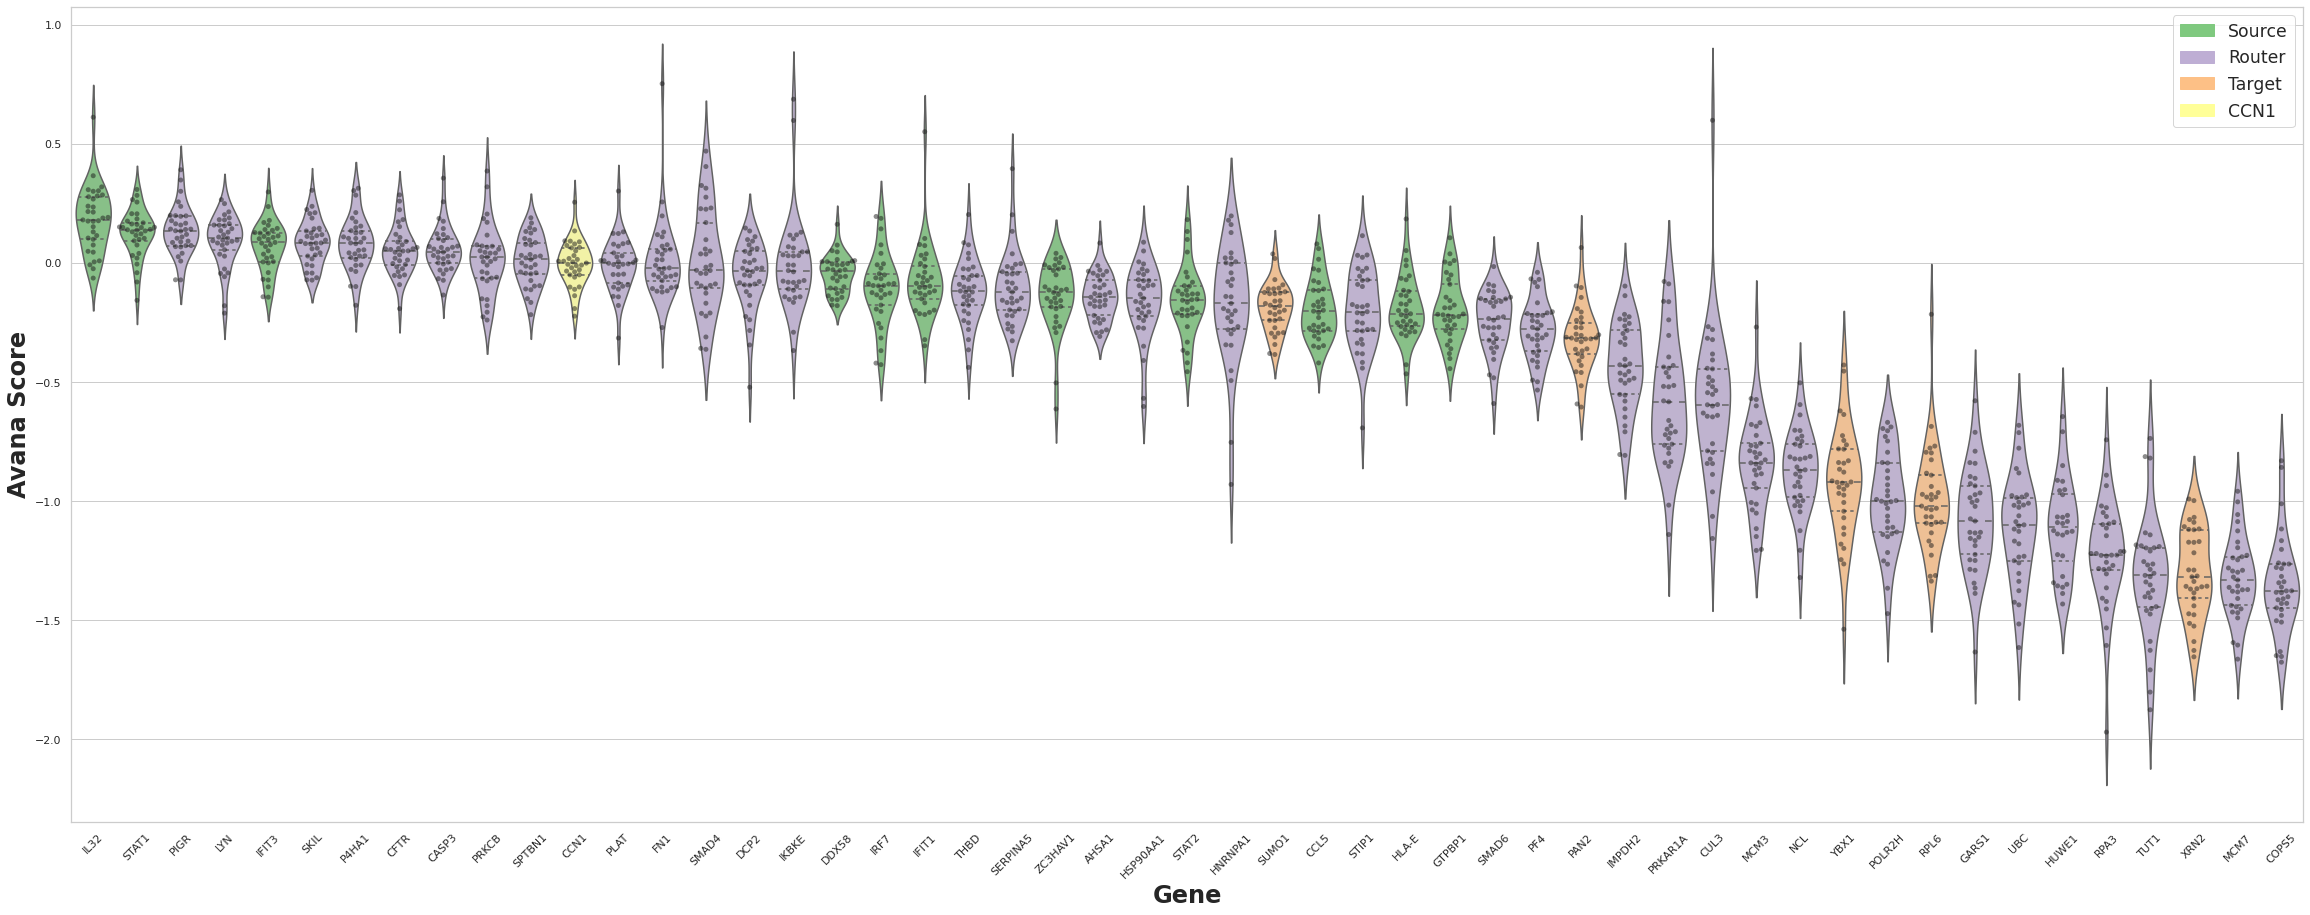

In [10]:
# violin plot of CRISPR gene dependencies

# set seaborn plot parameters
sns.set(rc={'figure.figsize':(40,15)})
sns.set_theme(style='whitegrid')

# generate color palette
#colors = np.where(avana.median()<-0.5, warm, cool) # based on medians
colors = [] # based on node types
for column in avana:
    if (column in sources):
      colors.append(accent1)
    if (column in routers):
      colors.append(accent2)
    if (column in targets):
      colors.append(accent3)
    if (column == 'CCN1'):
      colors.append(accent4)

# generate violin plot
ax = sns.violinplot(data=avana, palette=colors, scale='count', inner='quartile')

# overlay swarm plot
ax = sns.swarmplot(data=avana, color='k', alpha=0.5)

# draw horizontal line of interest
#ax.axhline(-0.5)

# label plot
#plt.title('CRISPR Gene Dependencies')
plt.xlabel('Gene', fontsize=24, weight='bold')
plt.xticks(rotation=45)
plt.ylabel('Avana Score', fontsize=24, weight='bold')

# generate legend
source_patch = mpatches.Patch(color=accent1, label='Source')
router_patch = mpatches.Patch(color=accent2, label='Router')
target_patch = mpatches.Patch(color=accent3, label='Target')
ccn1_patch = mpatches.Patch(color=accent4, label='CCN1')
plt.legend(handles=[source_patch,router_patch,target_patch,ccn1_patch],
           fontsize='x-large')

# save and show figure
plt.savefig('4C_GBM_Avana.svg')
plt.show()

In [11]:
# determine how many GBM cell lines have DEMETER2 data for these genes
demeter2.count()

IFIT1        2
TUT1         2
AHSA1        2
PF4         27
P4HA1       31
IFIT3       27
CASP3       27
IRF7        31
STAT1       31
LYN         31
SPTBN1       2
SKIL        31
PRKCB       31
CCN1        13
FN1         31
ZC3HAV1     31
HLA-E       31
SMAD4       31
IKBKE       31
CFTR        31
SUMO1       12
DDX58       13
STAT2       31
PIGR        31
THBD        27
DCP2        31
IMPDH2      31
GARS1       27
PLAT        31
MCM3        31
CCL5        27
GTPBP1      27
SMAD6       31
PAN2        27
HSP90AA1    31
CUL3        27
XRN2        27
YBX1        31
SERPINA5    31
HNRNPA1     31
IL32        27
PRKAR1A     31
HUWE1       31
POLR2H      27
UBC         31
RPA3        31
MCM7        31
NCL         31
COPS5       31
RPL6        27
dtype: int64

In [12]:
# determine how many GBM cell lines have Avana data for these genes
avana.count()

IL32        33
STAT1       33
PIGR        33
LYN         33
IFIT3       33
SKIL        33
P4HA1       33
CFTR        33
CASP3       33
PRKCB       33
SPTBN1      33
CCN1        33
PLAT        33
FN1         33
SMAD4       33
DCP2        33
IKBKE       33
DDX58       33
IRF7        33
IFIT1       33
THBD        33
SERPINA5    33
ZC3HAV1     33
AHSA1       33
HSP90AA1    33
STAT2       33
HNRNPA1     33
SUMO1       33
CCL5        33
STIP1       33
HLA-E       33
GTPBP1      33
SMAD6       33
PF4         33
PAN2        33
IMPDH2      33
PRKAR1A     33
CUL3        33
MCM3        33
NCL         33
YBX1        33
POLR2H      33
RPL6        33
GARS1       33
UBC         33
HUWE1       28
RPA3        33
TUT1        33
XRN2        33
MCM7        33
COPS5       33
dtype: int64

## WebGestalt

### Subnetwork (mSBW abstract)

In [13]:
# upload WebGestalt enrichment results text file
from google.colab import files
uploaded = files.upload()

Saving enrichment_results_wg_result1608328621.txt to enrichment_results_wg_result1608328621.txt


In [14]:
# make dataframe from WebGestalt enrichment results
webgestalt = pd.read_csv('enrichment_results_wg_result1608328621.txt',
                         sep='\t', header=0) # tab seperated values
webgestalt['-log10FDR'] = -np.log10(webgestalt['FDR'])
webgestalt = webgestalt.sort_values(by=['-log10FDR'],
                                    ascending=True) # sort by log10(FDR)
webgestalt

,geneSet,description,link,size,overlap,expect,enrichmentRatio,pValue,FDR,overlapId,userId,-log10FDR
9,hsa04062,Chemokine signaling pathway,http://www.kegg.jp/kegg-bin/show_pathway?hsa04...,189,6,1.091734,5.495843,6.855632e-04,0.022349,4067;5196;5579;6352;6772;6773,STAT1;LYN;CCL5;PF4;STAT2;PRKCB,1.650735
8,hsa04621,NOD-like receptor signaling pathway,http://www.kegg.jp/kegg-bin/show_pathway?hsa04...,168,6,0.970430,6.182823,3.661858e-04,0.013264,3320;3665;6352;6772;6773;9641,STAT1;CCL5;IRF7;HSP90AA1;IKBKE;STAT2,1.877323
7,hsa05160,Hepatitis C,http://www.kegg.jp/kegg-bin/show_pathway?hsa05...,131,6,0.756705,7.929117,9.394453e-05,0.003828,23586;3434;3665;6772;6773;9641,STAT1;IRF7;DDX58;IKBKE;STAT2;IFIT1,2.417001
6,hsa05167,Kaposi sarcoma-associated herpesvirus infection,http://www.kegg.jp/kegg-bin/show_pathway?hsa05...,186,7,1.074405,6.515233,8.093781e-05,0.003769,3133;3665;4067;6772;6773;836;9641,STAT1;LYN;CASP3;IRF7;HLA-E;IKBKE;STAT2,2.423729
5,hsa05164,Influenza A,http://www.kegg.jp/kegg-bin/show_pathway?hsa05...,171,7,0.987760,7.086745,4.741106e-05,0.002576,23586;3665;5579;6352;6772;6773;9641,STAT1;CCL5;IRF7;DDX58;IKBKE;STAT2;PRKCB,2.589054
4,hsa04623,Cytosolic DNA-sensing pathway,http://www.kegg.jp/kegg-bin/show_pathway?hsa04...,63,5,0.363911,13.739607,2.762837e-05,0.001801,23586;3665;5437;6352;9641,CCL5;IRF7;POLR2H;DDX58;IKBKE,2.744397
2,hsa05169,Epstein-Barr virus infection,http://www.kegg.jp/kegg-bin/show_pathway?hsa05...,201,8,1.161051,6.890310,1.560960e-05,0.001574,23586;3133;3665;4067;6772;6773;836;9641,STAT1;LYN;CASP3;IRF7;HLA-E;DDX58;IKBKE;STAT2,2.803084
3,hsa04933,AGE-RAGE signaling pathway in diabetic complic...,http://www.kegg.jp/kegg-bin/show_pathway?hsa04...,99,6,0.571861,10.492063,1.930893e-05,0.001574,2335;4089;5579;6772;7056;836,STAT1;FN1;THBD;CASP3;SMAD4;PRKCB,2.803084
0,hsa05168,Herpes simplex infection,http://www.kegg.jp/kegg-bin/show_pathway?hsa05...,185,9,1.068629,8.422008,7.947629e-07,0.000212,23586;3133;3434;3665;6352;6772;6773;836;9641,STAT1;CCL5;CASP3;IRF7;HLA-E;DDX58;IKBKE;STAT2;...,3.673399
1,hsa05161,Hepatitis B,http://www.kegg.jp/kegg-bin/show_pathway?hsa05...,144,8,0.831798,9.617725,1.301409e-06,0.000212,23586;3665;4089;5579;6772;6773;836;9641,STAT1;CASP3;IRF7;SMAD4;DDX58;IKBKE;STAT2;PRKCB,3.673399


In [15]:
# retrieve genes enriched for "herpes simplex infection"
webgestalt['userId'][0]

'STAT1;CCL5;CASP3;IRF7;HLA-E;DDX58;IKBKE;STAT2;IFIT1'

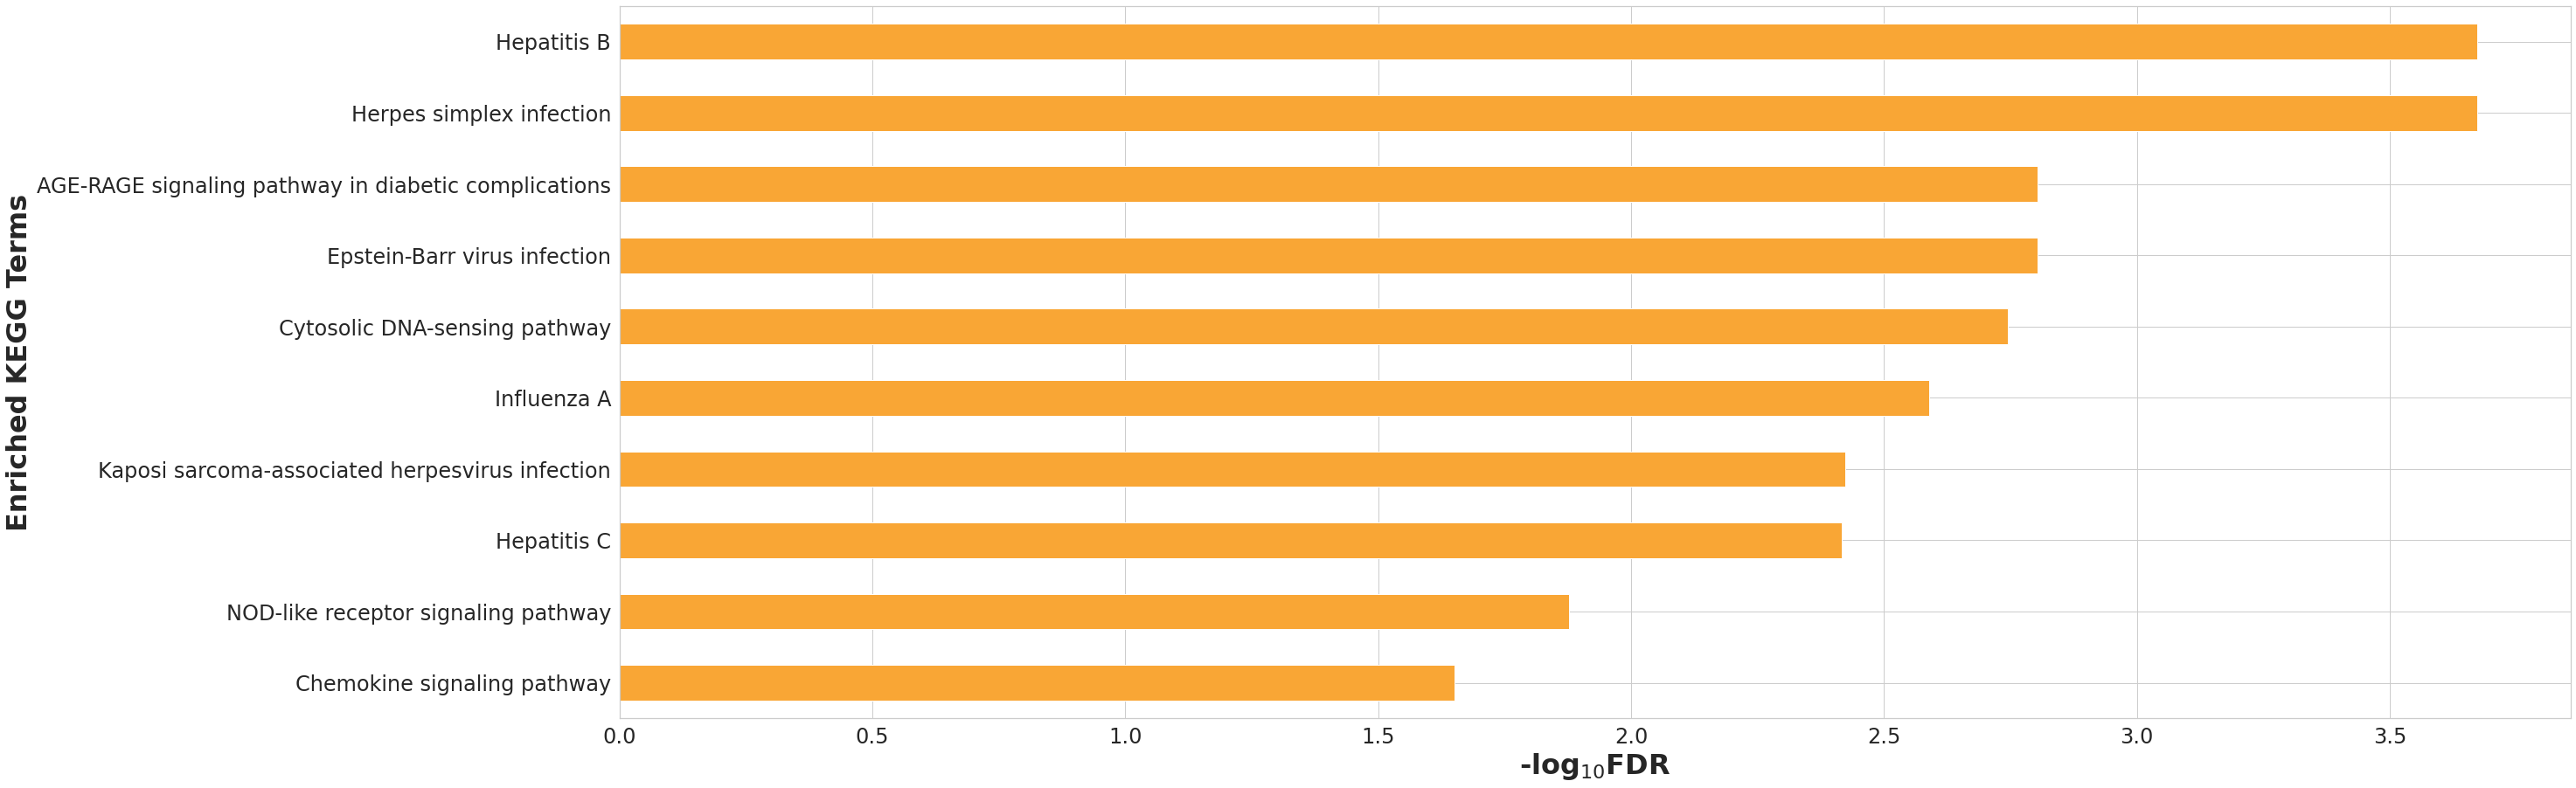

In [16]:
# plot WebGestalt enrichment results

# set seaborn plot parameters
sns.set_theme(style='whitegrid')

# make horizontal bar plot
ax = webgestalt.plot.barh(x='description', y='-log10FDR', fontsize=24,
                          figsize=(40,15), legend=False, color=warm)

# label axes
ax.set_xlabel('-log$_{10}$FDR', fontsize=32, weight='bold')
ax.set_ylabel('Enriched KEGG Terms', fontsize=32, weight='bold')

# save and show figure
plt.savefig('2A_ORA_KEGG_Network.svg')
plt.show()

### Edges (AACR abstract)

In [17]:
# upload WebGestalt enrichment results text file
from google.colab import files
uploaded = files.upload()

Saving enrichment_results_wg_result1605821970.txt to enrichment_results_wg_result1605821970.txt


In [18]:
# make dataframe from WebGestalt enrichment results
wg_edges = pd.read_csv('enrichment_results_wg_result1605821970.txt',
                         sep='\t', header=0) # tab seperated values
wg_edges['-log10FDR'] = -np.log10(wg_edges['FDR'])
wg_edges = wg_edges.sort_values(by=['-log10FDR'],
                                    ascending=True) # sort by log10(FDR)
wg_edges

,geneSet,description,link,size,overlap,expect,enrichmentRatio,pValue,FDR,overlapId,userId,-log10FDR
9,GO:0045088,regulation of innate immune response,http://amigo.geneontology.org/amigo/term/GO:00...,369,8,0.465014,17.203768,8.479440e-09,7.708659e-06,3551;6772;6777;7316;25939;57506;79671;84166,NLRC5;IKBKB;SAMHD1;NLRX1;MAVS;UBC;STAT1;STAT5B,5.113021
8,GO:0002684,positive regulation of immune system process,http://amigo.geneontology.org/amigo/term/GO:00...,979,11,1.233737,8.915998,5.571730e-09,5.628067e-06,60;3383;3551;5295;6772;6777;7316;27040;57506;7...,PIK3R1;LAT;NLRC5;IKBKB;NLRX1;MAVS;ICAM1;UBC;ST...,5.249641
7,GO:0002252,immune effector process,http://amigo.geneontology.org/amigo/term/GO:00...,1141,12,1.437890,8.345562,1.654208e-09,1.879800e-06,60;3383;3429;5295;6772;6777;10075;25939;27040;...,PIK3R1;LAT;NLRC5;SAMHD1;NLRX1;MAVS;ICAM1;IFI27...,5.725888
6,GO:0002682,regulation of immune system process,http://amigo.geneontology.org/amigo/term/GO:00...,1400,13,1.764282,7.368435,1.055684e-09,1.371032e-06,60;2833;3383;3551;5295;6772;6777;7316;25939;27...,PIK3R1;LAT;NLRC5;IKBKB;SAMHD1;CXCR3;NLRX1;MAVS...,5.862952
5,GO:0006952,defense response,http://amigo.geneontology.org/amigo/term/GO:00...,1518,14,1.912986,7.318401,1.611422e-10,2.441573e-07,2833;3383;3429;3551;6373;6772;6777;7316;9734;2...,LAT;NLRC5;IKBKB;HDAC9;SAMHD1;CXCL11;CXCR3;NLRX...,6.612330
4,GO:0050776,regulation of immune response,http://amigo.geneontology.org/amigo/term/GO:00...,909,12,1.145523,10.475562,1.203858e-10,2.188855e-07,60;3383;3551;5295;6772;6777;7316;25939;27040;5...,PIK3R1;LAT;NLRC5;IKBKB;SAMHD1;NLRX1;MAVS;ICAM1...,6.659783
3,GO:0006955,immune response,http://amigo.geneontology.org/amigo/term/GO:00...,1919,16,2.418327,6.616144,1.042799e-11,2.370022e-08,60;2833;3383;3429;3551;5295;6373;6772;6777;731...,PIK3R1;LAT;NLRC5;IKBKB;SAMHD1;CXCL11;CXCR3;NLR...,7.625248
2,GO:0034097,response to cytokine,http://amigo.geneontology.org/amigo/term/GO:00...,1100,14,1.386222,10.099394,2.068123e-12,6.267103e-09,2833;3383;3429;3551;5295;6175;6373;6772;6777;7...,PIK3R1;NLRC5;IKBKB;SAMHD1;CXCL11;CXCR3;MAVS;IC...,8.202933
1,GO:0071345,cellular response to cytokine stimulus,http://amigo.geneontology.org/amigo/term/GO:00...,1015,14,1.279105,10.945156,6.901146e-13,3.136916e-09,2833;3383;3429;3551;5295;6175;6373;6772;6777;7...,PIK3R1;NLRC5;IKBKB;SAMHD1;CXCL11;CXCR3;MAVS;IC...,8.503497
0,GO:0019221,cytokine-mediated signaling pathway,http://amigo.geneontology.org/amigo/term/GO:00...,705,14,0.888442,15.757920,4.662937e-15,4.239076e-11,2833;3383;3429;3551;5295;6175;6373;6772;6777;7...,PIK3R1;NLRC5;IKBKB;SAMHD1;CXCL11;CXCR3;MAVS;IC...,10.372729


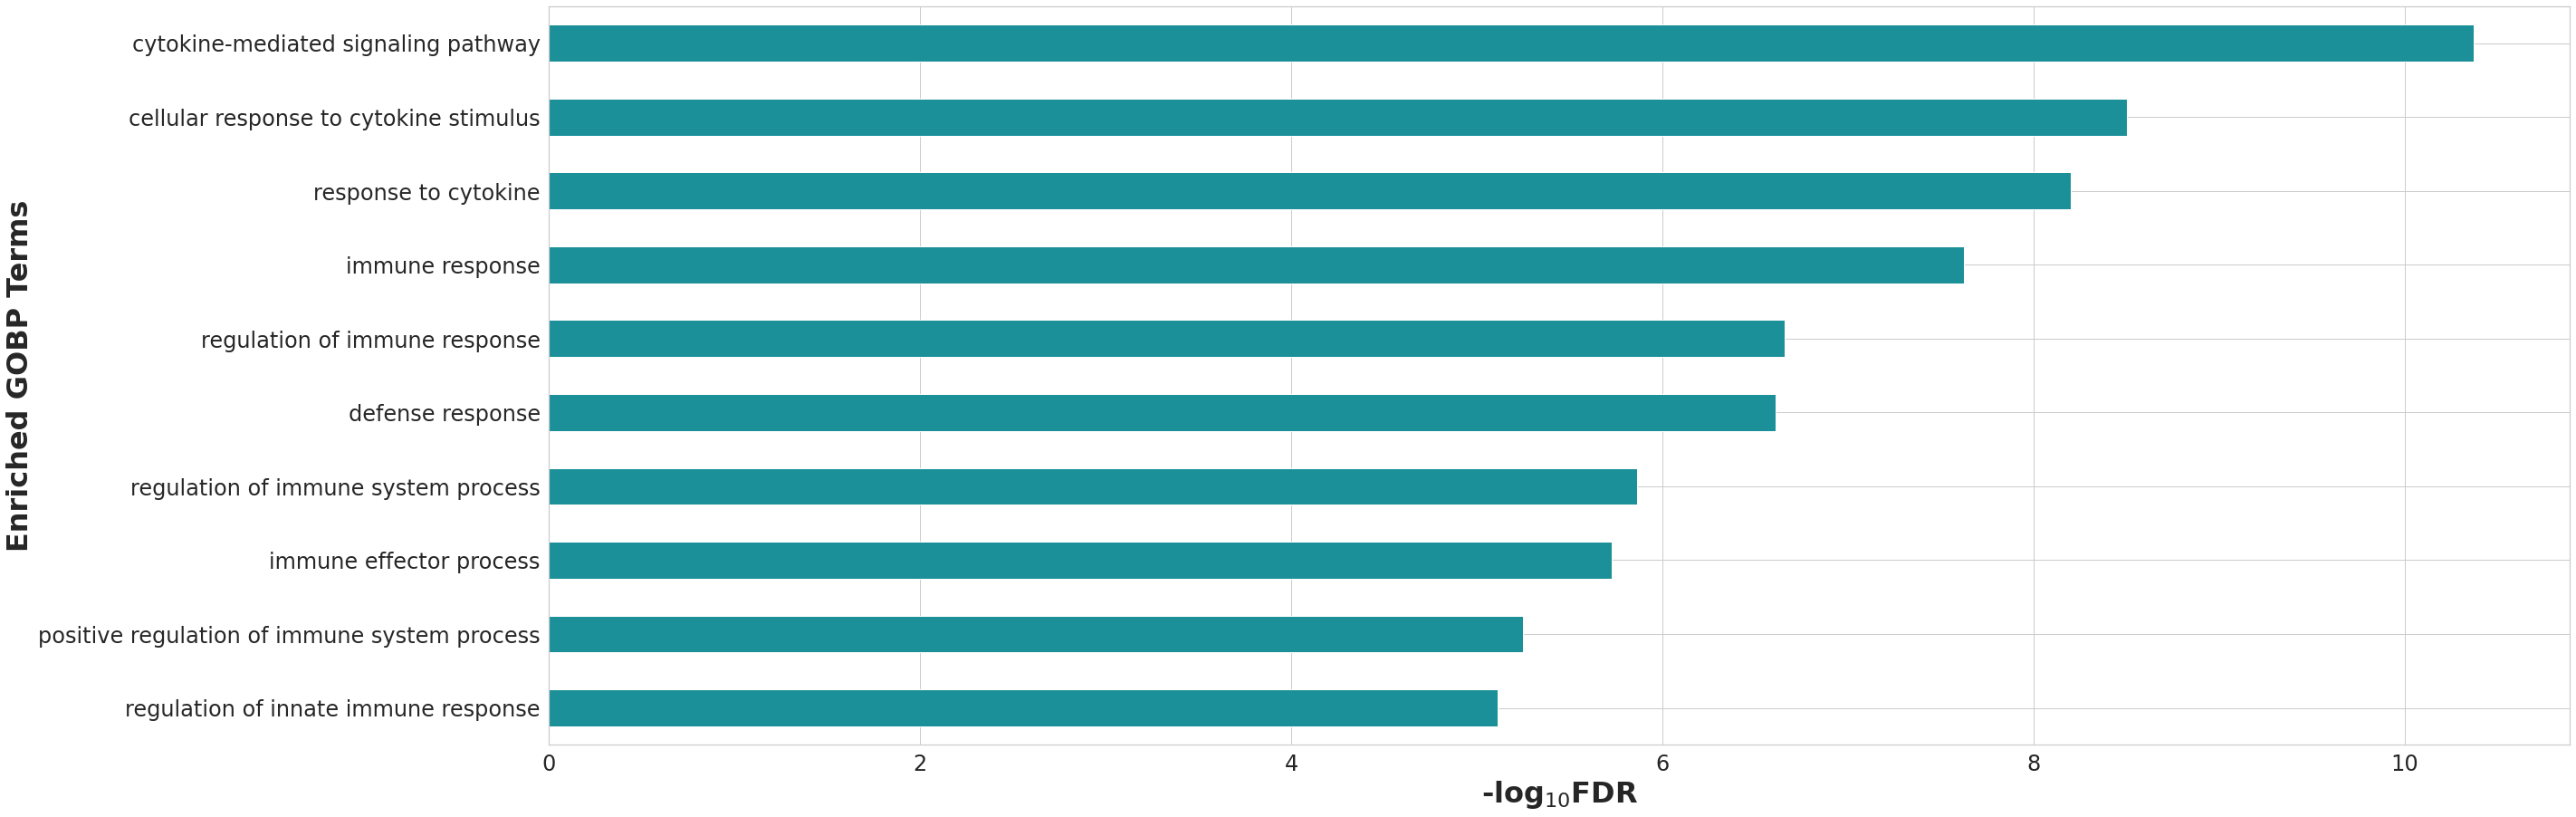

In [19]:
# plot WebGestalt enrichment results

# set seaborn plot parameters
sns.set_theme(style='whitegrid')

# make horizontal bar plot
ax = wg_edges.plot.barh(x='description', y='-log10FDR', fontsize=24,
                        figsize=(40,15), legend=False, color=cool)

# label axes
ax.set_xlabel('-log$_{10}$FDR', fontsize=32, weight='bold')
ax.set_ylabel('Enriched GOBP Terms', fontsize=32, weight='bold')

# save and show figure
plt.savefig('2C_ORA_GOBP_Edges.svg')
plt.show()

# Priorities

Top
* DELTA
* Betweeness Centrality

Drop
* Protein Atlas (https://www.proteinatlas.org/about/help/dataaccess)
* IDH1/2 motifs